In [22]:
import pandas as pd 
import edhec_risk_kit as erk
ind = pd.read_csv("C:/Users/Younes/PycharmProjects/finance-courses/data/ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates=True)/100

In [10]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
192607,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
192608,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
192609,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
192610,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
192611,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [33]:
ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period("M")

In [34]:
ind.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110, freq='M')

In [35]:
ind.columns = ind.columns.str.strip()
ind.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [38]:
ind.shape

(1110, 30)

<AxesSubplot:>

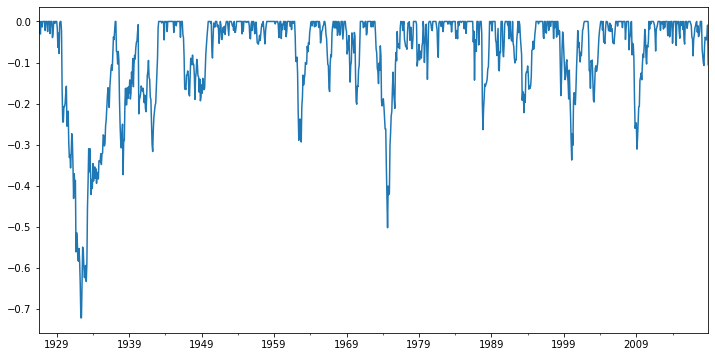

In [44]:
erk.drawdown(ind["Food"])["Drawdown"].plot.line(figsize=(12, 6))

In [49]:
erk.var_gaussian(ind[["Food", "Smoke", "Coal", "Beer", "Fin"]])

Food     0.068226
Smoke    0.084150
Coal     0.167033
Beer     0.106206
Fin      0.101333
dtype: float64

In [58]:
erk.var_gaussian(ind).sort_values().head()

Telcm    0.067026
Food     0.068226
Hlth     0.080671
Util     0.081711
Smoke    0.084150
dtype: float64

<AxesSubplot:>

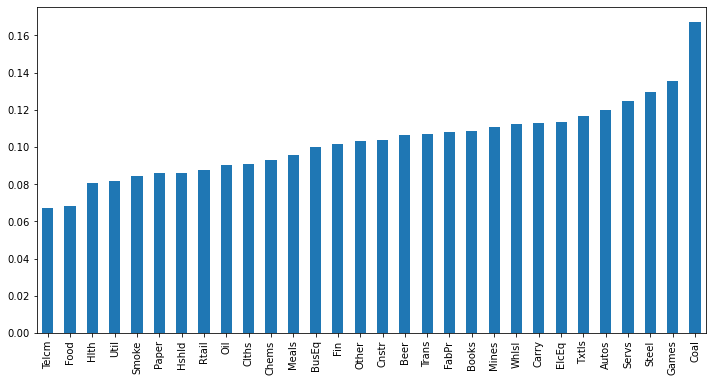

In [69]:
erk.var_gaussian(ind).sort_values().plot.bar(figsize=(12,6))

<AxesSubplot:title={'center':'industry Sharp Ratio from 1926-2018'}>

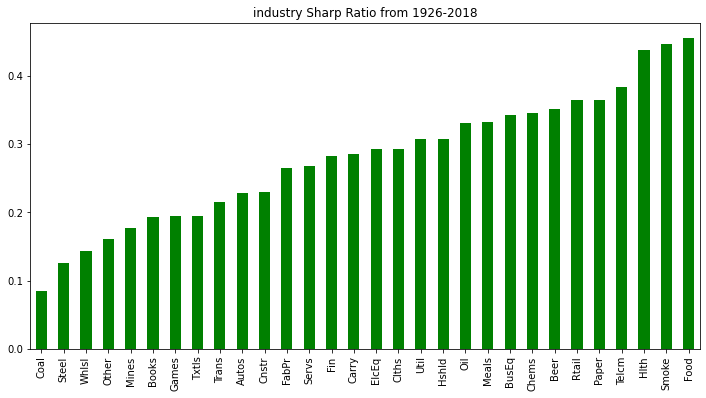

In [67]:
erk.sharpe_ratio(ind, risk_free_rate=0.03, periods_per_year=12).sort_values().plot.bar(title="industry Sharp Ratio from 1926-2018",
                                                                                       color="green",
                                                                                       figsize=(12,6))

<AxesSubplot:title={'center':'industry Sharp Ratio from 1926-2018'}>

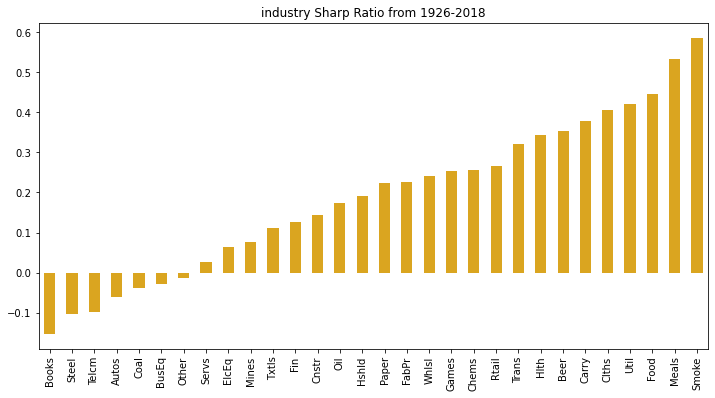

In [71]:
erk.sharpe_ratio(ind["2000":], risk_free_rate=0.03, periods_per_year=12).sort_values().plot.bar(title="industry Sharp Ratio from 1926-2018",
                                                                                       color="goldenrod",
                                                                                       figsize=(12,6))

In [77]:
er= erk.annualize_rets(ind["1995":"2000"], 12)

<AxesSubplot:>

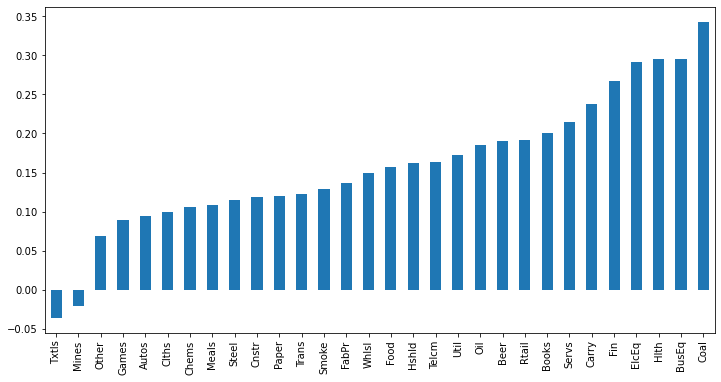

In [82]:
er.sort_values().plot.bar(figsize=(12,6))

In [86]:
cov = ind["1995":"2000"].cov()
cov.shape

(30, 30)

In [88]:
cov.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002287,0.002077,0.001757,0.000701,0.000886,0.001208,0.001474,0.001105,0.001253,0.001021,...,0.000610,0.000211,-0.000280,0.001205,0.001312,0.000633,0.001165,0.001085,0.001839,0.000898
Beer,0.002077,0.004599,0.001143,0.001147,0.000765,0.002447,0.001415,0.001689,0.001292,0.001721,...,0.000978,0.000400,0.000028,0.001455,0.001974,0.000609,0.001442,0.001634,0.002236,0.001196
Smoke,0.001757,0.001143,0.007130,0.000296,-0.000099,0.000981,0.000761,0.000877,0.000687,0.000555,...,0.000057,-0.000266,-0.000300,0.001061,0.000241,0.001363,0.000069,0.000590,0.001117,0.001418
Games,0.000701,0.001147,0.000296,0.003271,0.001485,0.001018,0.001814,0.001219,0.001547,0.001291,...,0.001615,0.002399,0.002935,0.001615,0.001438,0.001681,0.001649,0.001383,0.002080,0.002088
Books,0.000886,0.000765,-0.000099,0.001485,0.002302,0.000876,0.002037,0.000657,0.001559,0.001362,...,0.001627,0.001996,0.001624,0.001481,0.001576,0.001205,0.001995,0.001026,0.001979,0.001283
